In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

df_2004 = pd.read_csv('table_tableau2004.csv', encoding="latin1")
df_2006 = pd.read_csv('table_tableau2006.csv', encoding="latin1")
df_2009 = pd.read_csv('table_tableau2009.csv', encoding="latin1")
df_2011 = pd.read_csv('table_tableau2011.csv', encoding="latin1")
df_2015 = pd.read_csv('table_tableau2015.csv', encoding="latin1")
df_2019 = pd.read_csv('table_tableau2019.csv', encoding="latin1")
df_2021 = pd.read_csv('table_tableau2021.csv', encoding="utf-8-sig")
df_2025 = pd.read_csv('CandidatesVotes 2025.csv',encoding="utf-8-sig")

#Creating a new column called Party
df_2004['Party'] = df_2004['Elected Candidate'].str.extract(r'(\w+)$')
df_2006['Party'] = df_2006['Elected Candidate'].str.extract(r'(\w+)$')
df_2009['Party'] = df_2009['Elected Candidate'].str.extract(r'(\w+)$')
df_2011['Party'] = df_2011['Elected Candidate'].str.extract(r'(\w+)$')
df_2015['Party'] = df_2015['Elected Candidate'].str.extract(r'(\w+)$')
df_2019['Party'] = df_2019['Elected Candidate'].str.extract(r'(\w+)$')
df_2021['Party'] = df_2021['Elected Candidate'].str.extract(r'(\w+)$')

#Extracting the candidate name from the Elected Candidate Column
df_2004['Candidate'] = df_2004['Elected Candidate'].str.replace(r'\s+\w+$', '', regex=True)
df_2004.drop(columns=['Elected Candidate'], inplace=True)
df_2004['Party'] = df_2004['Party'].str.strip()

df_2006['Candidate'] = df_2006['Elected Candidate'].str.replace(r'\s+\w+$', '', regex=True)
df_2006.drop(columns=['Elected Candidate'], inplace=True)
df_2006['Party'] = df_2006['Party'].str.strip()

df_2009['Candidate'] = df_2009['Elected Candidate'].str.replace(r'\s+\w+$', '', regex=True)
df_2009.drop(columns=['Elected Candidate'], inplace=True)
df_2009['Party'] = df_2009['Party'].str.strip()

df_2011['Candidate'] = df_2011['Elected Candidate'].str.replace(r'\s+\w+$', '', regex=True)
df_2011.drop(columns=['Elected Candidate'], inplace=True)
df_2011['Party'] = df_2011['Party'].str.strip()

df_2015['Candidate'] = df_2015['Elected Candidate'].str.replace(r'\s+\w+$', '', regex=True)
df_2015.drop(columns=['Elected Candidate'], inplace=True)
df_2015['Party'] = df_2015['Party'].str.strip()

df_2019['Candidate'] = df_2019['Elected Candidate'].str.replace(r'\s+\w+$', '', regex=True)
df_2019.drop(columns=['Elected Candidate'], inplace=True)
df_2019['Party'] = df_2019['Party'].str.strip()

df_2021['Candidate'] = df_2021['Elected Candidate'].str.replace(r'\s+\w+$', '', regex=True)
df_2021.drop(columns=['Elected Candidate'], inplace=True)
df_2021['Party'] = df_2021['Party'].str.strip()

df_2025 = df_2025.dropna(subset=['Valid Ballots'])
df_2025['Valid Ballots'] = df_2025['Valid Ballots'].str.replace(',', '').astype(int)

# Grouping vote totals by party
votes_2004 = df_2004.groupby('Party')['Valid Ballots'].sum().reset_index()
votes_2006 = df_2006.groupby('Party')['Valid Ballots'].sum().reset_index()
votes_2009 = df_2009.groupby('Party')['Valid Ballots'].sum().reset_index()
votes_2011 = df_2011.groupby('Party')['Valid Ballots'].sum().reset_index()
votes_2015 = df_2015.groupby('Party')['Valid Ballots'].sum().reset_index()
votes_2019 = df_2019.groupby('Party')['Valid Ballots'].sum().reset_index()
votes_2021 = df_2021.groupby('Party')['Valid Ballots'].sum().reset_index()
votes_2025 = df_2025.groupby('Party')['Valid Ballots'].sum().reset_index()

# Adding a column to distinguish the year
votes_2004['Year'] = '2004'
votes_2006['Year'] = '2006'
votes_2009['Year'] = '2009'
votes_2011['Year'] = '2011'
votes_2015['Year'] = '2015'
votes_2019['Year'] = '2019'
votes_2021['Year'] = '2021'
votes_2025['Year'] = '2025'

#Merging all years years into one DataFrame
combined_votes = pd.concat([votes_2004, votes_2006, votes_2009, votes_2011, votes_2015, votes_2019, votes_2021, votes_2025], ignore_index=True)
combined_votes = combined_votes.groupby(['Year', 'Party'])['Valid Ballots']. sum().reset_index()



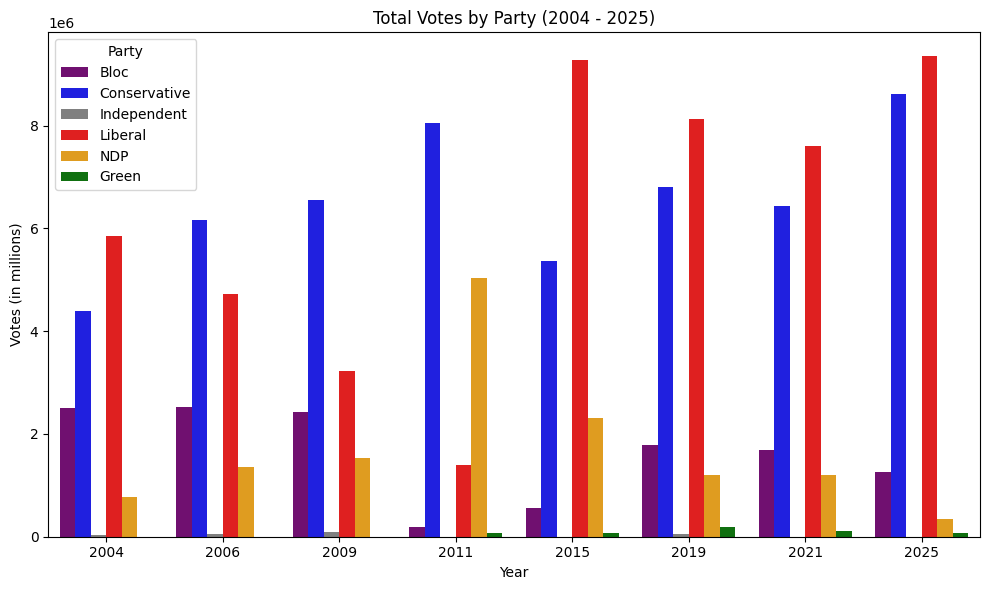

In [64]:
party_colors = {
    'Liberal': 'red',
    'Conservative': 'blue',
    'NDP': 'orange',
    'Bloc': 'purple',
    'Green': 'green',
    'Independent': 'gray'
}

#Bar Chart of Total Votes by Party for Each Election year
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_votes, x='Year', y='Valid Ballots', hue='Party', palette = party_colors)
plt.title('Total Votes by Party (2004 - 2025)')
plt.ylabel('Votes (in millions)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

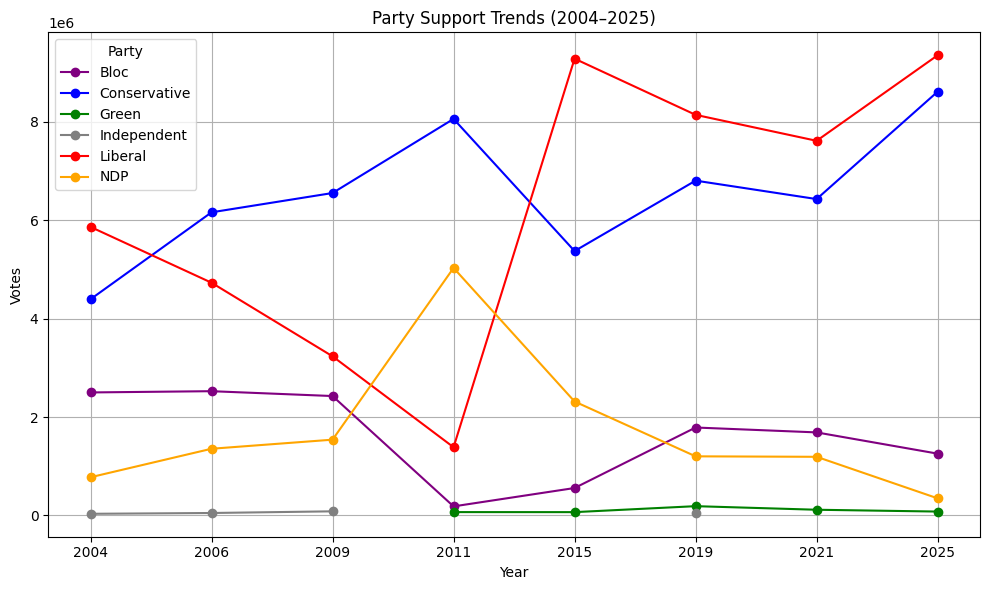

In [ ]:
#line graph to show voting Trends over time
pivot = combined_votes.pivot(index='Year', columns='Party', values='Valid Ballots')
ax = pivot.plot(kind='line', marker='o', figsize=(10, 6), color=[party_colors.get(col, 'black') for col in pivot.columns])

plt.title('Party Support Trends (2004–2025)')
plt.ylabel('Votes')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

#One outlier is the Liberals' vote share jumped significantly from 2011 Elections to 2015 Elections.

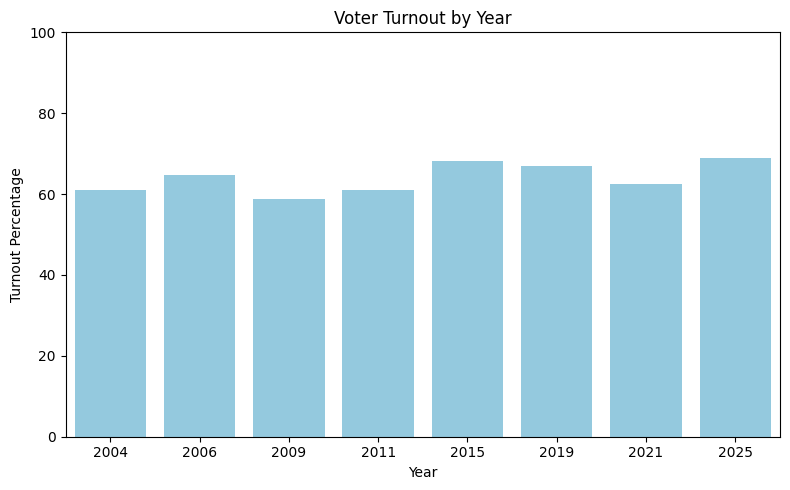

In [ ]:
#A bar chart to show voter turnout by Year
turnout_df = pd.DataFrame({
    'Year': [2004, 2006, 2009, 2011, 2015, 2019, 2021, 2025],
    'Turnout (%)': [60.90, 64.70, 58.80, 61.10, 68.30, 67.00, 62.60, 69.00]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=turnout_df, x='Year', y='Turnout (%)', color='skyblue')
plt.title('Voter Turnout by Year')
plt.ylabel('Turnout Percentage')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

#turnout has been somewhat consistent over the years; with 2011 being the lowest voter turnout in a Federal election cycle

In [ ]:
#Next, I want to explore Prediction Modeling/Classification(which party will win a given riding), 
#and Regression Modelling(Voter turnout percentage by province)